In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model 

In [2]:
df = pd.read_csv(r"hp.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


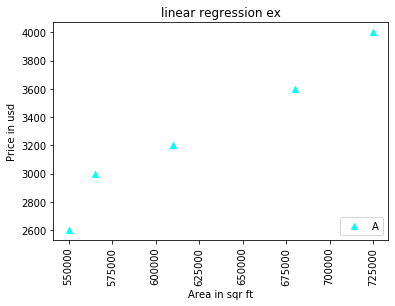

In [3]:
plt.scatter(df['price'], df['area'], c="Cyan",marker="^")
plt.xlabel("Area in sqr ft")
plt.ylabel('Price in usd')
plt.title('linear regression ex')
plt.legend("Area", loc=4)
plt.xticks(rotation='vertical')
plt.show()

In [4]:
reg=linear_model.LinearRegression()
reg.fit(df[["area"]], df["price"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
reg.coef_

array([135.78767123])

In [6]:
reg.intercept_

180616.43835616432

In [7]:
reg.predict([[10000]])

array([1538493.15068493])

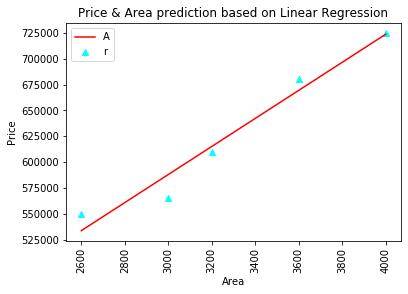

In [8]:
plt.scatter(df.area, df.price, marker="^", c="Cyan" )
plt.plot(df.area, reg.predict(df[["area"]]), color ='r')
plt.xlabel("Area")
plt.ylabel("Price")
plt.legend("Area")
plt.title("Price & Area prediction based on Linear Regression")
plt.xticks(rotation="vertical")
plt.show()

In [9]:
reg.score(df[["area"]], df.price)*100

95.84301138199486

In [10]:
ds=pd.read_csv(r"c:\Data Science\Pandas\DataSets&DataFrame\airquality.csv")
ds.head(10)

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
5,28.0,NaN,14.9,66,5,6
6,23.0,299.0,8.6,65,5,7
7,19.0,99.0,13.8,59,5,8
8,8.0,19.0,20.1,61,5,9
9,NaN,194.0,8.6,69,5,10


In [11]:
ds1=ds[["Wind","Temp"]]

In [12]:
ds1.head()

,Wind,Temp
0,7.4,67
1,8.0,72
2,12.6,74
3,11.5,62
4,14.3,56


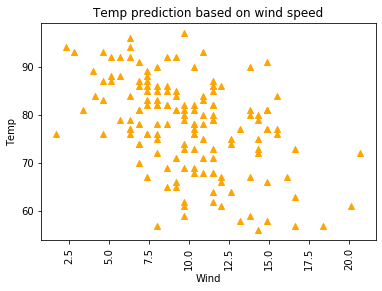

In [13]:
plt.scatter(ds1["Wind"], ds1["Temp"], c="Orange", marker="^")
plt.xlabel("Wind")
plt.ylabel("Temp")
plt.title("Temp prediction based on wind speed")
plt.xticks(rotation="vertical")
plt.show()

In [14]:
reger= linear_model.LinearRegression()
reger.fit(ds1[["Wind"]], ds1["Temp"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
reger.coef_

array([-1.2304789])

In [16]:
reger.intercept_

90.13486665211119

In [17]:
reger.predict([[15]])

array([71.67768321])

In [18]:
reger.score(ds1[["Wind"]], ds1["Temp"])*100

20.975289740694315

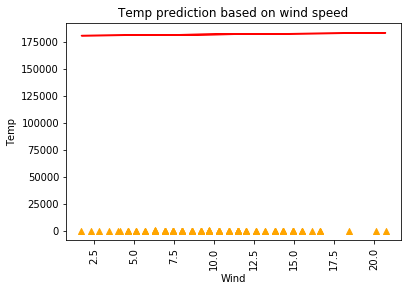

In [19]:
plt.scatter(ds1["Wind"], ds1["Temp"], c="Orange", marker="^")
plt.plot(ds1.Wind, reg.predict(ds1[["Wind"]]), color ='r')
plt.xlabel("Wind")
plt.ylabel("Temp")
plt.title("Temp prediction based on wind speed")
plt.xticks(rotation="vertical")
plt.show()

## Township

In [22]:
df1=pd.read_csv("township.csv")

In [23]:
df1

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [24]:
dummy_var= pd.get_dummies(df1["town"])

In [25]:
dummy_var

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [28]:
concat_var=pd.concat([df1, dummy_var], axis=1)

In [29]:
concat_var

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [34]:
concat_var.drop(["town", "monroe township"], axis=1, inplace=True)

In [35]:
concat_var

,area,price,robinsville,west windsor
0,2600,550000,0,0
1,3000,565000,0,0
2,3200,610000,0,0
3,3600,680000,0,0
4,4000,725000,0,0
5,2600,585000,0,1
6,2800,615000,0,1
7,3300,650000,0,1
8,3600,710000,0,1
9,2600,575000,1,0


In [40]:
x=concat_var.drop(["price"], axis=1)

In [41]:
x

,area,robinsville,west windsor
0,2600,0,0
1,3000,0,0
2,3200,0,0
3,3600,0,0
4,4000,0,0
5,2600,0,1
6,2800,0,1
7,3300,0,1
8,3600,0,1
9,2600,1,0


In [43]:
y=concat_var["price"]
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [45]:
model=linear_model.LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
model.coef_

array([  126.89744141, 25686.4115244 , 40013.97548914])

In [47]:
model.intercept_

209776.3921737331

In [48]:
model.predict([[3600,0,0]])

array([666607.18125134])

In [49]:
model.predict([[3600,1,0]])

array([692293.59277575])

In [50]:
model.predict([[3600,0,1]])

array([706621.15674048])